In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot: xlabel='age', ylabel='Count'>

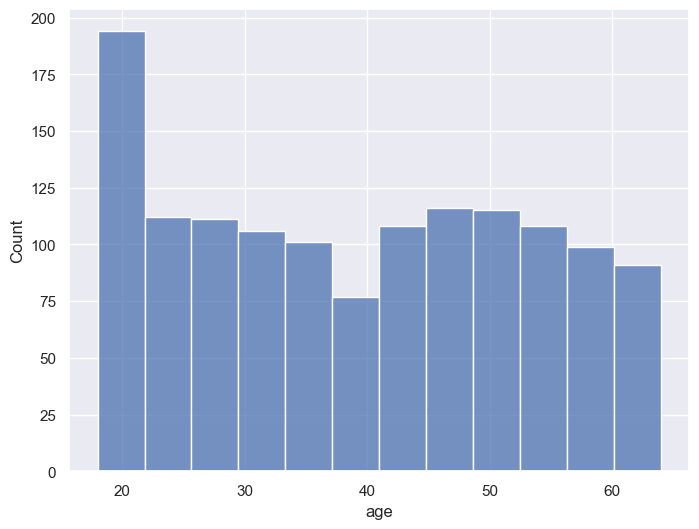

In [14]:
sns.set_theme()
plt.figure(figsize=(8,6))
sns.histplot(df['age'])

In [21]:
px.histogram(df, x='sex',color='sex', histfunc='count',color_discrete_sequence=['#636EFA', '#EF553B'])

<AxesSubplot: xlabel='bmi', ylabel='Count'>

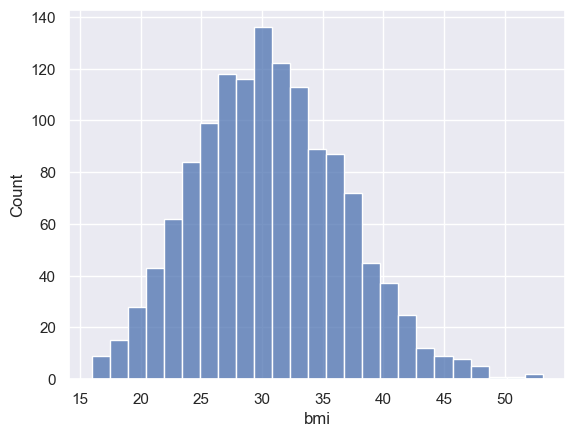

In [30]:
sns.histplot(df['bmi'])

In [39]:
px.histogram(df['bmi'])

<AxesSubplot: xlabel='children', ylabel='count'>

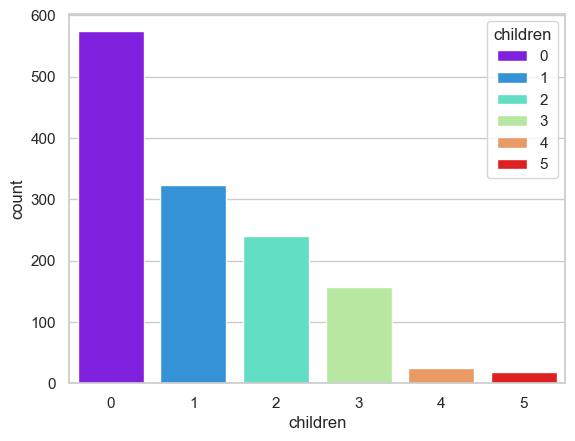

In [50]:
sns.countplot(x='children', data=df, hue='children',palette='rainbow')

In [48]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot: xlabel='region', ylabel='count'>

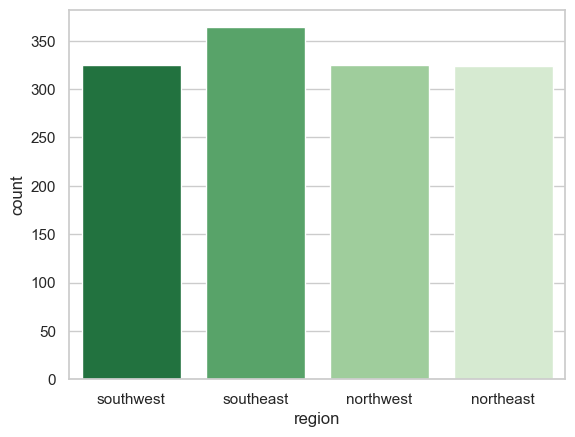

In [53]:
sns.countplot(x='children', data=df, hue='children',palette='Reds')

In [56]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot: xlabel='smoker', ylabel='count'>

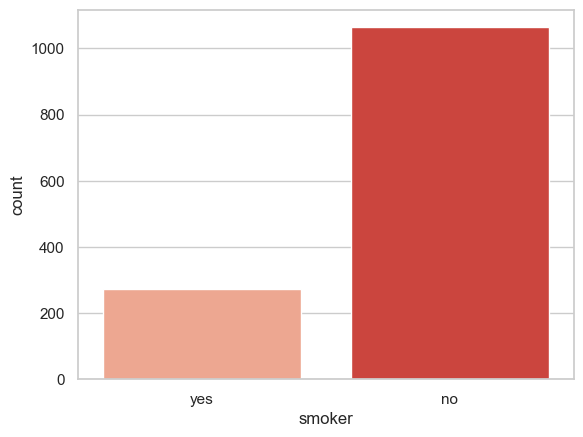

In [54]:
sns.countplot(x='smoker', data=df, hue='smoker',palette='Reds')

In [55]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot: xlabel='charges', ylabel='Count'>

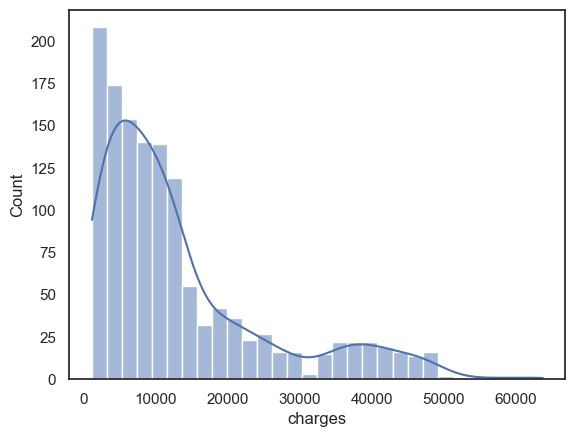

In [60]:
sns.set_style('white')
sns.histplot(x='charges',data=df,kde=True)


In [61]:
df.replace({'sex':{'male':0, 'female':1}},inplace=True)

In [62]:
df.replace({'smoker':{'no':0, 'yes':1}},inplace=True)
df.replace({'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [63]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [64]:
X=df.drop('charges',axis=1)
y=df['charges']


In [66]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [189]:
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [190]:
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(f'mean squared error:{mean_absolute_error(pred,y_test)}')
print(f'r2_score:{r2_score(pred,y_test)}')

mean squared error:4146.639024795187
r2_score:0.6932597437991943


In [191]:
model1=PassiveAggressiveRegressor()
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)
print(f'mean squared error:{mean_absolute_error(pred1,y_test)}')
print(f'r2_score:{r2_score(pred1,y_test)}')

mean squared error:4730.788330646909
r2_score:-0.3692423758094949


Text(0.5, 1.0, 'Comparison of Actual vs Predicted Values')

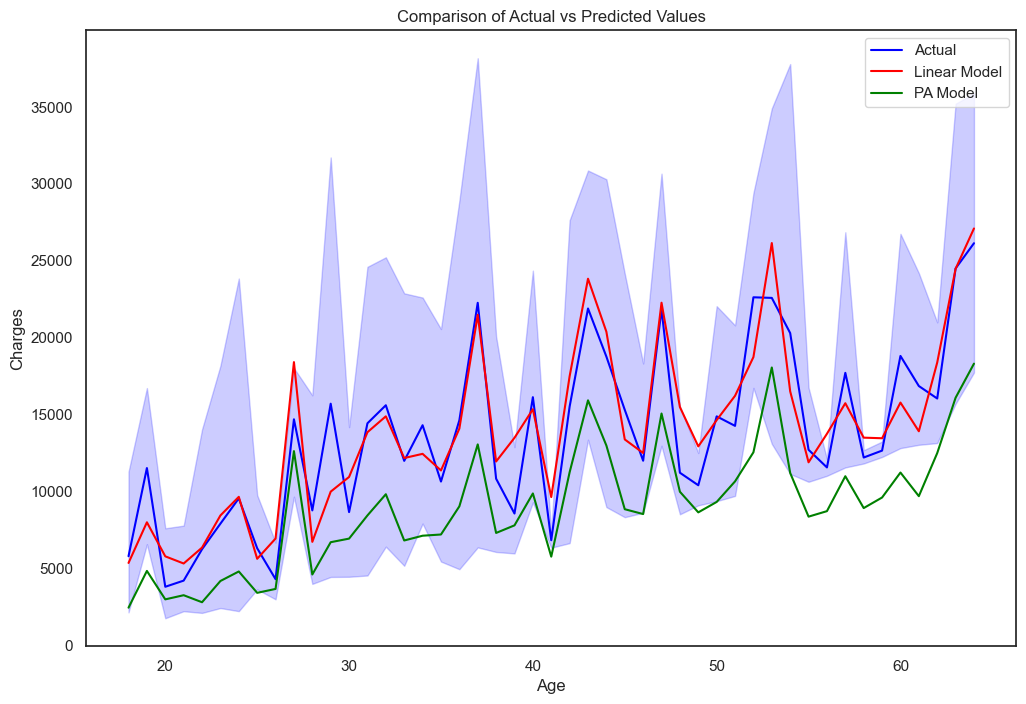

In [192]:
plt.figure(figsize=(12,8))
sns.lineplot(x=X_test['age'],y=y_test,color='blue',label='Actual')
sns.lineplot(x=X_test['age'],y=pred,color='red', errorbar=None,label='Linear Model')
sns.lineplot(x=X_test['age'],y=pred1,color='green', errorbar=None, label='PA Model')
plt.legend()
plt.legend()


plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Comparison of Actual vs Predicted Values')

In [209]:
feature_names = df.columns[:-1] 
a = pd.DataFrame(df.iloc[12][:-1].values.reshape(1, -1), columns=feature_names)
print(f"Linear prediction: {model.predict(a)[0]}")
print(f"PA prediction: {model1.predict(a)[0]}")
print(f'Actual Charges:{df.iloc[12][-1:]}')


Linear prediction: 4965.117859389309
PA prediction: 1388.852672087839
Actual Charges:charges    1826.843
Name: 12, dtype: float64


## Thank You!!